In [32]:
import pandas as pd 
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes

ModuleNotFoundError: No module named 'windrose'

In [2]:
df = pd.read_csv("data/benin-malanville.csv")

In [3]:
print(df)

               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

        WSstdev     WD  WDstdev   BP  C

In [4]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [5]:
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [6]:
df.isna()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
525596,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
525597,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
525598,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [7]:
null_percent = (df.isna().sum() / len(df)) * 100

In [8]:
print(null_percent)

Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64


In [9]:
null_percent[null_percent > 5]

Comments    100.0
dtype: float64

In [12]:
cols_to_check = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']

In [13]:
z_scores = np.abs(stats.zscore(df[cols_to_check], nan_policy='omit'))

In [14]:
outliers = (z_scores > 3).any(axis=1)

In [15]:
print("Number of outlier rows:", outliers.sum())


Number of outlier rows: 7740


In [16]:
df[outliers][cols_to_check].head()

,GHI,DNI,DHI,ModA,ModB,WS,WSgust
670,836.0,235.0,610.6,778.8,783.8,3.2,4.1
671,1274.0,698.8,615.2,1210.3,1210.3,3.4,4.1
672,938.0,340.1,612.8,891.1,891.1,3.4,4.6
673,718.5,126.8,593.2,682.6,682.6,4.7,5.6
674,1349.0,771.8,618.0,1281.5,1281.5,4.0,4.6


In [17]:
for col in ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']:
    print(col, "negative values:", (df[col] < 0).sum())

GHI negative values: 258847
DNI negative values: 275987
DHI negative values: 259182
ModA negative values: 0
ModB negative values: 0
WS negative values: 0
WSgust negative values: 0


In [18]:
for col in cols_to_check:
    median = df[col].median()
    
    df[col] = df[col].apply(lambda x: median if (x < 0 or pd.isna(x)) else x)
    
    z = np.abs(stats.zscore(df[col], nan_policy='omit'))
    df.loc[z > 3, col] = median

In [19]:
df.to_csv("data/benin_clean.csv", index=False)


In [24]:
sns.set(style="whitegrid")
%matplotlib inline 

In [25]:
df = pd.read_csv("data/benin_clean.csv") 
df['Timestamp'] = pd.to_datetime(df['Timestamp']) 

/home/segni/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


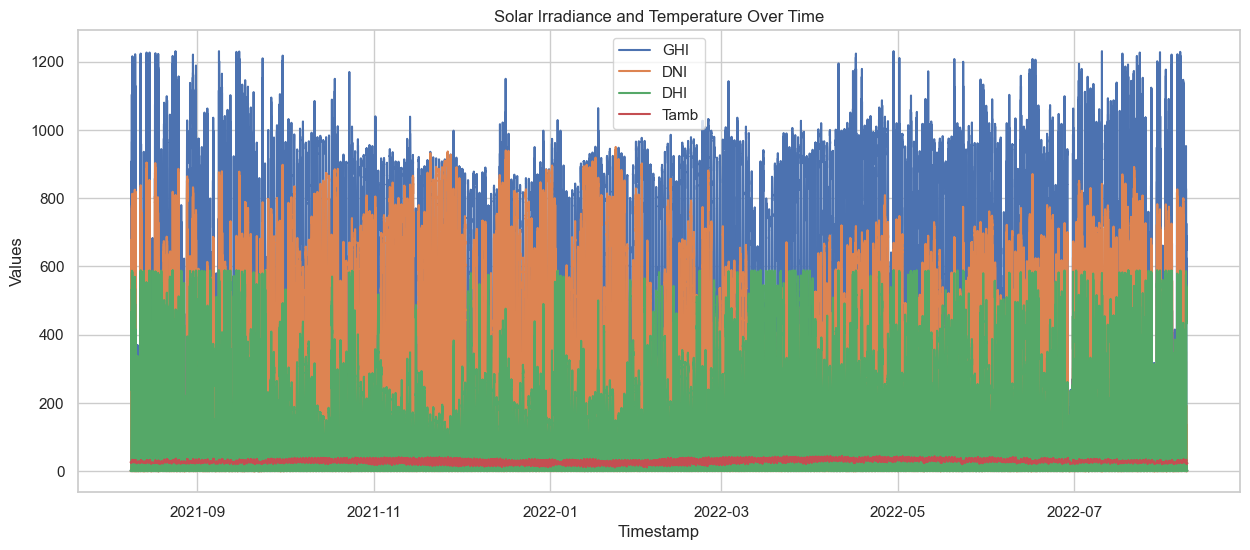

In [26]:
cols_to_plot = ['GHI', 'DNI', 'DHI', 'Tamb']

plt.figure(figsize=(15,6))
for col in cols_to_plot:
    plt.plot(df['Timestamp'], df[col], label=col)

plt.xlabel("Timestamp")
plt.ylabel("Values")
plt.title("Solar Irradiance and Temperature Over Time")
plt.legend()
plt.show()


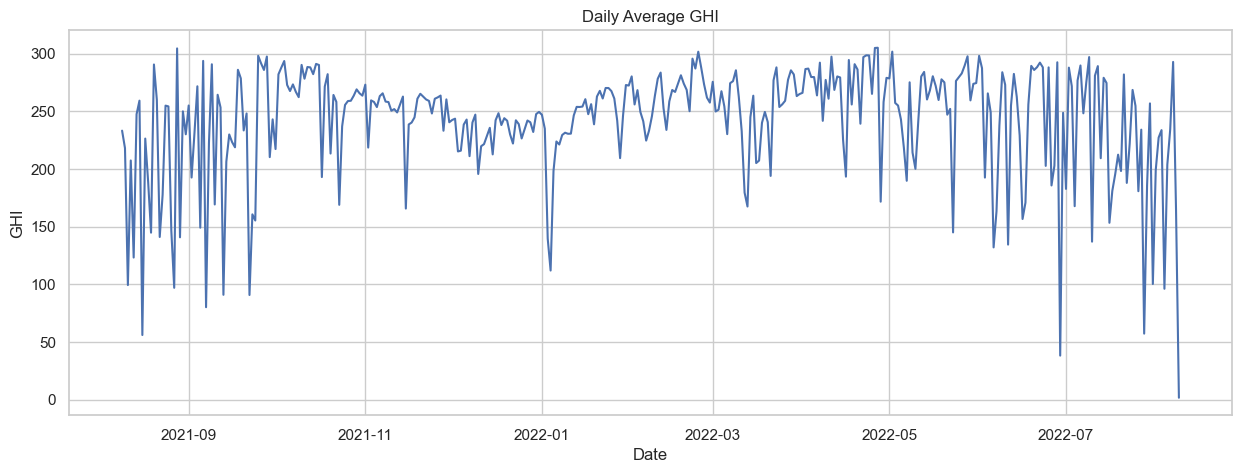

In [27]:
# Example: daily average of GHI
df['Date'] = df['Timestamp'].dt.date
daily_avg = df.groupby('Date')['GHI'].mean()

plt.figure(figsize=(15,5))
plt.plot(daily_avg.index, daily_avg.values)
plt.title("Daily Average GHI")
plt.xlabel("Date")
plt.ylabel("GHI")
plt.show()


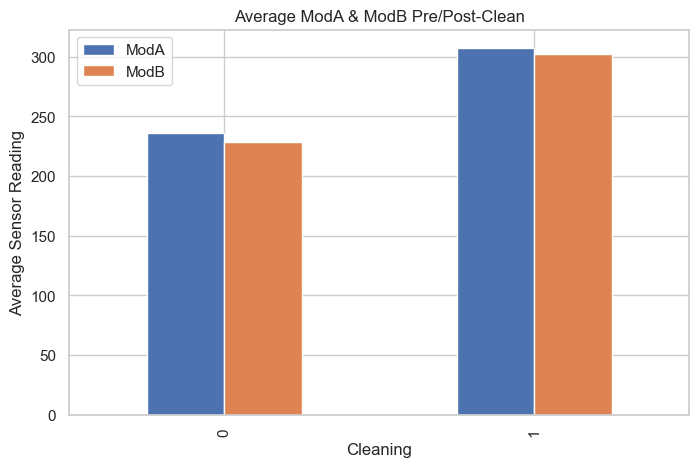

In [28]:
df.groupby('Cleaning')[['ModA','ModB']].mean().plot(kind='bar', figsize=(8,5))
plt.title("Average ModA & ModB Pre/Post-Clean")
plt.ylabel("Average Sensor Reading")
plt.show()


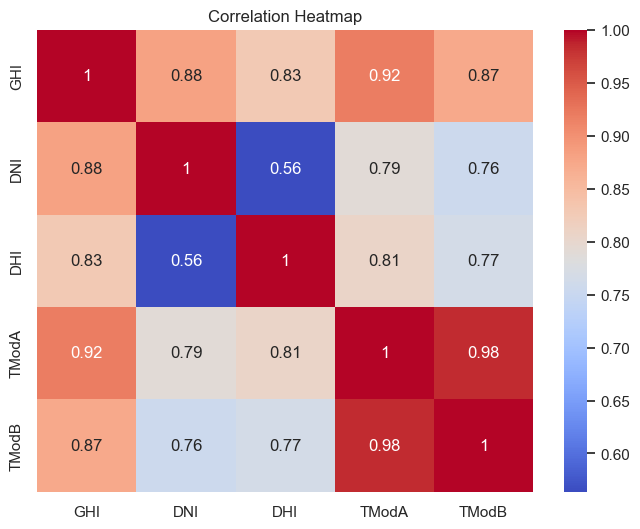

In [29]:
cols = ['GHI','DNI','DHI','TModA','TModB']
plt.figure(figsize=(8,6))
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


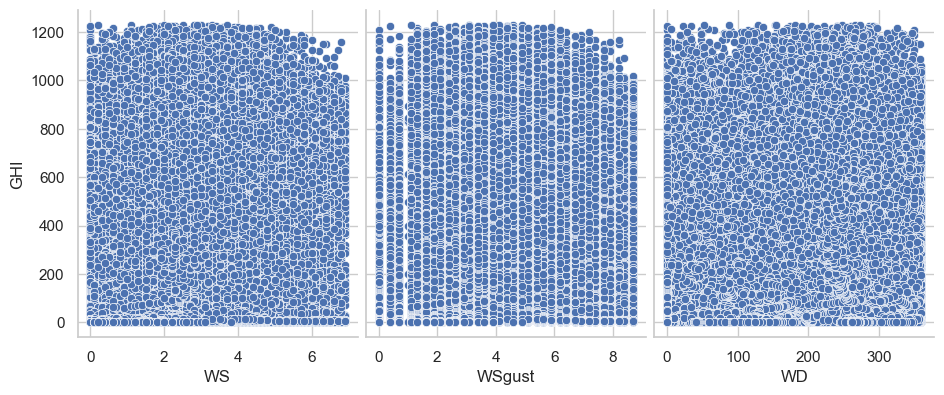

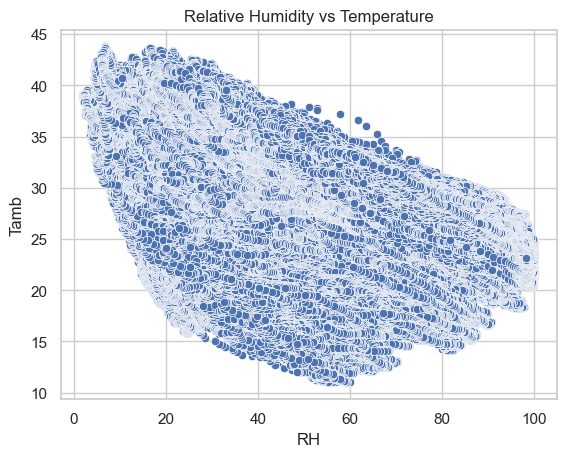

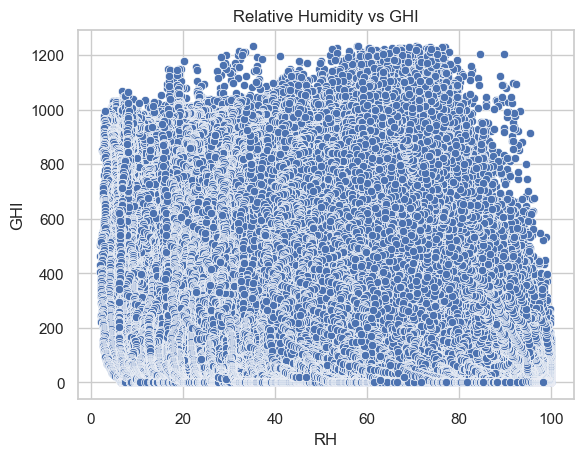

In [30]:
# WS, WSgust, WD vs GHI
sns.pairplot(df, x_vars=['WS','WSgust','WD'], y_vars='GHI', height=4, aspect=0.8, kind='scatter')
plt.show()

# RH vs Tamb or RH vs GHI
sns.scatterplot(data=df, x='RH', y='Tamb')
plt.title("Relative Humidity vs Temperature")
plt.show()
sns.scatterplot(data=df, x='RH', y='GHI')
plt.title("Relative Humidity vs GHI")
plt.show()


In [33]:
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.show()


NameError: name 'WindroseAxes' is not defined

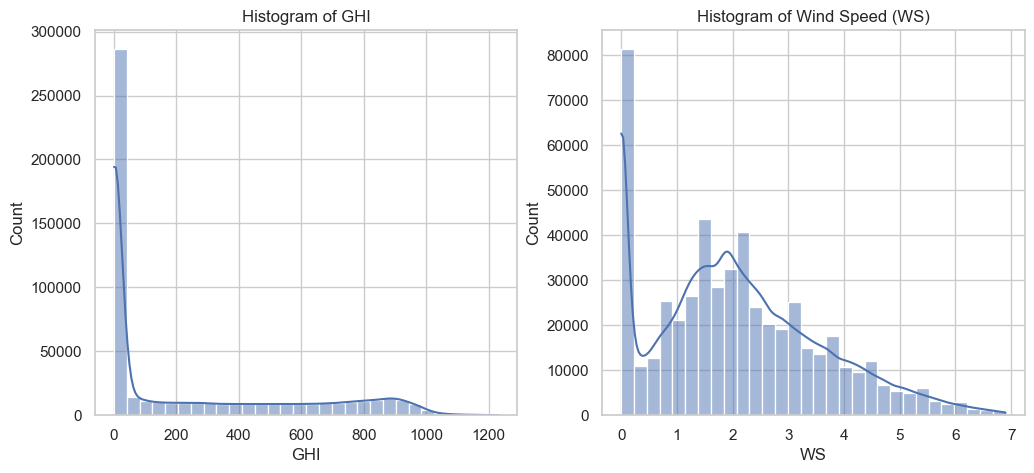

In [34]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['GHI'], kde=True, bins=30)
plt.title("Histogram of GHI")

plt.subplot(1,2,2)
sns.histplot(df['WS'], kde=True, bins=30)
plt.title("Histogram of Wind Speed (WS)")

plt.show()


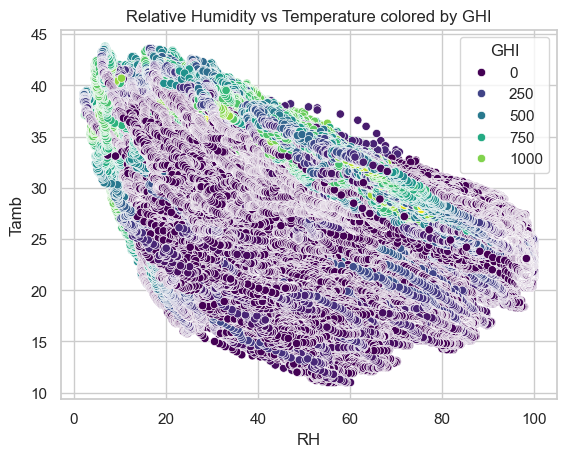

In [35]:
sns.scatterplot(data=df, x='RH', y='Tamb', hue='GHI', palette='viridis')
plt.title("Relative Humidity vs Temperature colored by GHI")
plt.show()


In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['Tamb'], df['GHI'], s=df['RH'], alpha=0.5)  # size = RH
plt.xlabel("Tamb (Temperature)")
plt.ylabel("GHI")
plt.title("GHI vs Temperature (Bubble size = RH)")
plt.show()
